In [1]:
#библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Расчет на биткоине

In [2]:
#импорт данных
data_btc_20 = pd.read_excel(r"C:\Users\Владимир\Desktop\bitcoin_2020.xlsx").sort_values('Дата')
data_btc_21 = pd.read_excel(r"C:\Users\Владимир\Desktop\bitcoin_2021.xlsx").sort_values('Дата')
data_btc_22 = pd.read_excel(r"C:\Users\Владимир\Desktop\bitcoin_2022.xlsx").sort_values('Дата')

data_list = [data_btc_20,data_btc_21, data_btc_22]

In [3]:
#общая доходность
data_btc_20['r'] = data_btc_20[
    'Значение'][1:].reset_index(drop = True)/data_btc_20[
    'Значение'][:-1].reset_index(drop = True) - 1

In [4]:
#Расчет скользящих средних
short = 5
long = 12
data_btc_20['SMA'] = data_btc_20['Значение'].rolling(short).mean()
data_btc_20['LMA'] = data_btc_20['Значение'].rolling(long).mean()

In [5]:
#удаление ненужных строк
data_btc_20 = data_btc_20.drop(len(data_btc_20)-1)
data_btc_20 = data_btc_20.drop(data_btc_20.index[0:long -1])

In [6]:
#расчет доходности стратегии
data_btc_20['strat'] = data_btc_20['r']*(
    data_btc_20['SMA']>data_btc_20['LMA']) - data_btc_20['r']*(
    data_btc_20['SMA']<data_btc_20['LMA'])

Годовая доходность стратегии скользящих средних 55.74%
Годовая доходность стратегии buy and hold 235.57%


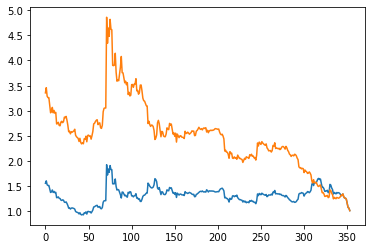

In [7]:
#визуализация
plt.plot(np.cumprod(1+data_btc_20['strat']))
plt.plot(np.cumprod(1+data_btc_20['r']))

#количество торгуемых дней
t_days = len(data_btc_20)
exch_t_days = 252

r_strat = np.prod(1+data_btc_20['strat'])**(t_days/len(data_btc_20['strat'])) - 1
r_bnh = np.prod(1+data_btc_20['r'])**(t_days/len(data_btc_20['r']))-1
print(
    'Годовая доходность стратегии скользящих средних ' + str(
        round(r_strat*100,2)) + '%')
print(
    'Годовая доходность стратегии buy and hold ' + str(round(r_bnh*100,2))+ '%')

### Упакую всё в функцию

In [8]:
# цикл по всем датасетам
def df_calc(data_list):
    for df in data_list:
        df['r'] = df[
        'Значение'][1:].reset_index(drop = True)/df[
        'Значение'][:-1].reset_index(drop = True) - 1
        short = 5
        long = 12
        df['SMA'] = df['Значение'].rolling(short).mean()
        df['LMA'] = df['Значение'].rolling(long).mean()
        df = df.drop(len(df)-1)
        df = df.drop(df.index[0:long -1])
        df['strat'] = df['r']*(
        df['SMA']>df['LMA']) - df['r']*(
        df['SMA']<df['LMA'])
        plt.plot(np.cumprod(1+df['strat']))
        plt.plot(np.cumprod(1+df['r']))
        r_strat = np.prod(1+df['strat'])**(252/len(df['strat'])) - 1
        r_bnh = np.prod(1+df['r'])**(252/len(df['r']))-1
        print(
            'Годовая доходность стратегии скользящих средних ' + str(
            round(r_strat*100,2)) + '%')
        print(
            'Годовая доходность стратегии buy and hold ' + str(round(r_bnh*100,2))+ '%')
        print()
        
#тоже, что и первое, но всегда второй столбец (независимо от названия)        
def df2_calc(data_list):
    for df in data_list:
        df['r'] = df.iloc[:, 1:2][1:].reset_index(drop = True)/df.iloc[:, 1:2][:-1].reset_index(drop = True) - 1
        short = 5
        long = 12
        df['SMA'] = df.iloc[:, 1:2].rolling(short).mean()
        df['LMA'] = df.iloc[:, 1:2].rolling(long).mean()
        df = df.drop(len(df)-1)
        df = df.drop(df.index[1:long -1])
        df['strat'] = df['r']*(df['SMA']>df['LMA']) - df['r']*(df['SMA']<df['LMA'])
        plt.plot(np.cumprod(1+df['strat']))
        plt.plot(np.cumprod(1+df['r']))
        r_strat = np.prod(1+df['strat'])**(252/len(df['strat'])) - 1
        r_bnh = np.prod(1+df['r'])**(252/len(df['r']))-1
        print(
            'Годовая доходность стратегии скользящих средних ' + str(
            round(r_strat*100,2)) + '%')
        print(
            'Годовая доходность стратегии buy and hold ' + str(round(r_bnh*100,2))+ '%')
        print()
        
#функция для одного датасета
def one_df_calc(df):
    df['r'] = df.iloc[:, 1:2][1:].reset_index(drop = True)/df.iloc[:, 1:2][:-1].reset_index(drop = True) - 1
    short = 5
    long = 12
    df['SMA'] = df.iloc[:, 1:2].rolling(short).mean()
    df['LMA'] = df.iloc[:, 1:2].rolling(long).mean()
    df = df.drop(len(df)-1)
    df = df.drop(df.index[1:long -1])
    df['strat'] = df['r']*(df['SMA']>df['LMA']) - df['r']*(df['SMA']<df['LMA'])
    plt.plot(np.cumprod(1+df['strat']))
    plt.plot(np.cumprod(1+df['r']))
    r_strat = np.prod(1+df['strat'])**(252/len(df['strat'])) - 1
    r_bnh = np.prod(1+df['r'])**(252/len(df['r']))-1
    print(
        'Годовая доходность стратегии скользящих средних ' + str(
        round(r_strat*100,2)) + '%')
    print(
        'Годовая доходность стратегии buy and hold ' + str(round(r_bnh*100,2))+ '%')
    print()

# Фондовый рынок - Газпром

In [9]:
#проверка на газпроме
df_GAZP_20 = pd.read_csv(r"C:\Users\Владимир\Desktop\GAZP_2020.csv", sep=';')
df_GAZP_20['<DATE>'] = pd.to_datetime(df_GAZP_20['<DATE>'], format='%Y%m%d')
df_GAZP_20 = df_GAZP_20[['<DATE>', '<CLOSE>']]

df_GAZP_21 = pd.read_csv(r"C:\Users\Владимир\Desktop\GAZP_2021.csv", sep=';')
df_GAZP_21['<DATE>'] = pd.to_datetime(df_GAZP_21['<DATE>'], format='%Y%m%d')
df_GAZP_21 = df_GAZP_21[['<DATE>', '<CLOSE>']]

df_GAZP_22 = pd.read_csv(r"C:\Users\Владимир\Desktop\GAZP_2022.csv", sep=';')
df_GAZP_22['<DATE>'] = pd.to_datetime(df_GAZP_22['<DATE>'], format='%Y%m%d')
df_GAZP_22 = df_GAZP_22[['<DATE>', '<CLOSE>']]

GAZP_list = [df_GAZP_20, df_GAZP_21, df_GAZP_22]

Годовая доходность стратегии скользящих средних 16.31%
Годовая доходность стратегии buy and hold -17.43%

Годовая доходность стратегии скользящих средних 0.19%
Годовая доходность стратегии buy and hold 56.74%

Годовая доходность стратегии скользящих средних 242.92%
Годовая доходность стратегии buy and hold -45.91%



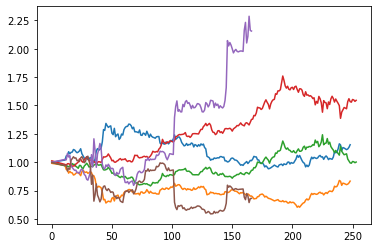

In [10]:
#вывод листа датафреймов
df2_calc(GAZP_list)

Важно отметить, что информация по неполному году (в данном случае 2022) отображается некорректно, поскольку данные до